### Automotive Velocity Control

A self-driving car company has requested a speed controller for their new model of electric autonomous vehicles. Unlike standard cruise control systems, this speed controller must manage transitions between all velocities ranging from 0 to 25 m/s (56 mph or 90 km/hr).

![title](https://apmonitor.com/pdc/uploads/Main/auto_schematic.png)


The speed controller changes a gas pedal (%) input that adjusts electrical current to the motor, creates a torque on the drive train, applies forward thrust from wheel contact on the road, and changes the velocity of the vehicle. Regenerative braking is part of this application by allowing the gas pedal to go from -50% to 100%. Decreases in velocity are also due to resistive forces. Negative velocities (backwards driving) is highly undesirable.

See [PDC Course Website](https://apmonitor.com/pdc/index.php/Main/SpeedControl) for full problem statement and [solution video](https://youtu.be/k46nCvOBllA). Below is an open-loop step test for changing the gas pedal from 0 to 50%.

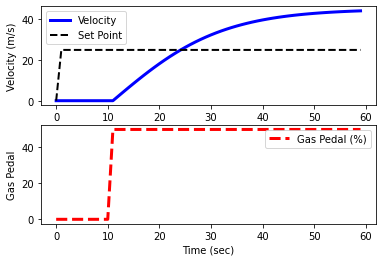

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython import display

# animate plots?
animate=True # True / False

# define model
def vehicle(v,t,u,load):
    # inputs
    #  v    = vehicle velocity (m/s)
    #  t    = time (sec)
    #  u    = gas pedal position (-50% to 100%)
    #  load = passenger load + cargo (kg)
    Cd = 0.24    # drag coefficient
    rho = 1.225  # air density (kg/m^3)
    A = 5.0      # cross-sectional area (m^2)
    Fp = 30      # thrust parameter (N/%pedal)
    m = 500      # vehicle mass (kg)
    # calculate derivative of the velocity
    dv_dt = (1.0/(m+load)) * (Fp*u - 0.5*rho*Cd*A*v**2)
    return dv_dt

tf = 60.0                 # final time for simulation
nsteps = 61               # number of time steps
delta_t = tf/(nsteps-1)   # how long is each time step?
ts = np.linspace(0,tf,nsteps) # linearly spaced time vector

# simulate step test operation
step = np.zeros(nsteps) # u = valve % open
step[11:] = 50.0       # step up pedal position
# passenger(s) + cargo load
load = 200.0 # kg
# velocity initial condition
v0 = 0.0
# set point
sp = 25.0
# for storing the results
vs = np.zeros(nsteps)
sps = np.zeros(nsteps)

plt.figure(1,figsize=(5,4))
if animate:
    plt.ion()
    plt.show()

# simulate with ODEINT
for i in range(nsteps-1):
    u = step[i]
    # clip inputs to -50% to 100%
    if u >= 100.0:
        u = 100.0
    if u <= -50.0:
        u = -50.0
    v = odeint(vehicle,v0,[0,delta_t],args=(u,load))
    v0 = v[-1]   # take the last value
    vs[i+1] = v0 # store the velocity for plotting
    sps[i+1] = sp

    # plot results
    if animate:
        display.clear_output(wait=True)
        plt.clf()
        plt.subplot(2,1,1)
        plt.plot(ts[0:i+1],vs[0:i+1],'b-',linewidth=3)
        plt.plot(ts[0:i+1],sps[0:i+1],'k--',linewidth=2)
        plt.ylabel('Velocity (m/s)')
        plt.legend(['Velocity','Set Point'],loc=2)
        plt.subplot(2,1,2)
        plt.plot(ts[0:i+1],step[0:i+1],'r--',linewidth=3)
        plt.ylabel('Gas Pedal')    
        plt.legend(['Gas Pedal (%)'])
        plt.xlabel('Time (sec)')
        plt.pause(0.1)    

if not animate:
    # plot results
    plt.subplot(2,1,1)
    plt.plot(ts,vs,'b-',linewidth=3)
    plt.plot(ts,sps,'k--',linewidth=2)
    plt.ylabel('Velocity (m/s)')
    plt.legend(['Velocity','Set Point'],loc=2)
    plt.subplot(2,1,2)
    plt.plot(ts,step,'r--',linewidth=3)
    plt.ylabel('Gas Pedal')    
    plt.legend(['Gas Pedal (%)'])
    plt.xlabel('Time (sec)')
    plt.show()